In [0]:
a = []
while(1):
    a.append('1')

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io 
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['train.csv'])) 
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]


In [4]:
from google.colab import files 
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
import io 
import pandas as pd
datatest = pd.read_csv(io.BytesIO(uploaded['test.csv'])) 
print(type(datatest))
print(datatest.head)

<class 'pandas.core.frame.DataFrame'>
<bound method NDFrame.head of          id  ...                                               text
0     20800  ...  PALO ALTO, Calif.  —   After years of scorning...
1     20801  ...  Russian warships ready to strike terrorists ne...
2     20802  ...  Videos #NoDAPL: Native American Leaders Vow to...
3     20803  ...  If at first you don’t succeed, try a different...
4     20804  ...  42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...     ...  ...                                                ...
5195  25995  ...  Of all the dysfunctions that plague the world’...
5196  25996  ...  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...
5197  25997  ...  Good morning. (Want to get California Today by...
5198  25998  ...  « Previous - Next » 300 US Marines To Be Deplo...
5199  25999  ...  Perhaps you’ve seen the new TV series whose pi...

[5200 rows x 4 columns]>


In [6]:
from google.colab import files 
uploaded = files.upload()

Saving submit.csv to submit.csv


In [7]:
import io 
import pandas as pd
datasubmit = pd.read_csv(io.BytesIO(uploaded['submit.csv'])) 
print(datasubmit.head())

      id  label
0  20800      0
1  20801      1
2  20802      0
3  20803      1
4  20804      1


In [8]:
testdata=pd.merge(datatest,datasubmit,on='id')  #merging submit data file to original
testdata.head()


,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [9]:
import pandas as pd    #create entire datasset by concat
finalset=pd.concat([data,testdata])  
finalset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
finalset.shape

(26000, 5)

In [11]:
lastset=finalset.dropna()
print(lastset.shape)
print(lastset.head())

(22860, 5)
   id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]


In [12]:
lastset.drop(["id"],axis=1,inplace=True)
lastset.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
lastset.shape

(22860, 4)

In [14]:
lastset_x=lastset.drop(columns=['label'])
print(lastset_x.head())
print(lastset_x.shape)
print(lastset_x.columns)

                                               title  ...                                               text
0  House Dem Aide: We Didn’t Even See Comey’s Let...  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...  ...  Ever get the feeling your life circles the rou...
2                  Why the Truth Might Get You Fired  ...  Why the Truth Might Get You Fired October 29, ...
3  15 Civilians Killed In Single US Airstrike Hav...  ...  Videos 15 Civilians Killed In Single US Airstr...
4  Iranian woman jailed for fictional unpublished...  ...  Print \nAn Iranian woman has been sentenced to...

[5 rows x 3 columns]
(22860, 3)
Index(['title', 'author', 'text'], dtype='object')


In [15]:
lastset_y=lastset.iloc[:,3:]
lastset_y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [16]:
#train test split to form test from megaset
from sklearn.model_selection import train_test_split

X_train_temp, kag_test_x, y_train_temp, kag_test_y = train_test_split(lastset_x,lastset_y,test_size=0.1,random_state=12)
print(X_train_temp.shape)
print(kag_test_x.shape)

# mega_test_x : Final testing file with statements
# mega_test_y : Final testing file with ratings

kag_train_x, kag_dev_x, kag_train_y, kag_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=2286,random_state=12)

print(kag_train_x.shape)
print(kag_dev_x.shape)

# mega_train_x : Training file with statements
# mega_train_y : Training file with ratings
# mega_dev_x   : Development testing file with statements
# mega_dev_y   : Development testing file with ratings
print(type(kag_train_x))
print(kag_train_y.shape)
print("Final size of train/dev/test : ",kag_train_x.shape,"/",kag_dev_x.shape,"/",kag_test_x.shape)

(20574, 3)
(2286, 3)
(18288, 3)
(2286, 3)
<class 'pandas.core.frame.DataFrame'>
(18288, 1)
Final size of train/dev/test :  (18288, 3) / (2286, 3) / (2286, 3)


In [17]:
kag_train_x.columns

Index(['title', 'author', 'text'], dtype='object')

In [18]:
kag_train_y.columns

Index(['label'], dtype='object')

In [0]:
kag_train_x.reset_index(inplace=True) #as i had problem with index number in dataset resetting it

In [20]:
kag_train_x.shape

(18288, 4)

In [21]:
kag_train_x.text[2]

'Former first daughter Chelsea Clinton defended Barron Trump after angry leftists started making fun of President Donald Trump’s youngest child during the inauguration. [“Barron Trump deserves the chance every child   be a kid,” Clinton wrote on Twitter.  In the same message, however, Clinton urged leftists to oppose Barron’s father for his policies. “Standing up for every kid also means opposing @POTUS policies that hurt kids,” she said: Leave Barron alone! pic. twitter.   —   Charlie Spiering (@charliespiering) January 23, 2017, '

In [22]:
kag_train_x.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
kag_train_x.head()

,title,author,text
0,US Prepares to Seek Arrest of Julian Assange -...,Lucas Nolan,U. S. authorities are preparing to seek the ar...
1,"Your Evening Briefing: Bernie Sanders, Donald ...",Andrea Kannapell and Sandra Stevenson,(Want to get this briefing by email? Here’s th...
2,Chelsea Clinton Urges Leftists to Leave Barron...,Charlie Spiering,Former first daughter Chelsea Clinton defended...
3,MILO Book ’Dangerous’ Back on Sale Soars to #1...,Charlie Nash,"Dangerous, the book by former Breitbart Senior..."
4,Large Sections of Australia’s Great Reef Are N...,Damien Cave and Justin Gillis,"SYDNEY, Australia — The Great Barrier Reef ..."


In [24]:
print(kag_train_x.text[2])
print(kag_train_x.text[3])
print(kag_train_x.text[4])

Former first daughter Chelsea Clinton defended Barron Trump after angry leftists started making fun of President Donald Trump’s youngest child during the inauguration. [“Barron Trump deserves the chance every child   be a kid,” Clinton wrote on Twitter.  In the same message, however, Clinton urged leftists to oppose Barron’s father for his policies. “Standing up for every kid also means opposing @POTUS policies that hurt kids,” she said: Leave Barron alone! pic. twitter.   —   Charlie Spiering (@charliespiering) January 23, 2017, 
Dangerous, the book by former Breitbart Senior Editor Milo Yiannopoulos, was released for   for the second time on Sunday, overtaking both Chelsea Clinton and Ben Sasse’s books and soaring to #1 on the Amazon best sellers list within a day. [The book is now being published through Milo’s own “Dangerous Books” publishing house, after former publisher Simon and Schuster decided to drop the title. That decision was made despite the fact that the book had already

In [0]:
kag_train_x.to_csv('kag_train_x.csv',index=False)  #ignore (to download codes upto here) 

In [0]:
kag_train_y.to_csv('kag_train_y.csv',index=False) #ignore

In [0]:
kag_test_x.to_csv('kag_test_x.csv',index=False) #ignore

In [0]:
kag_test_y.to_csv('kag_test_y.csv',index=False) #ignore all
kag_dev_x.to_csv('kag_dev_x.csv',index=False)
kag_dev_y.to_csv('kag_dev_y.csv',index=False)
#kag_train_x.to_csv('kag_train_x.csv',index=False)

In [25]:
import tensorflow
import pandas as pd
import keras

Using TensorFlow backend.


In [40]:
#tokenizing text attr
from keras.preprocessing.text import Tokenizer

tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(kag_train_x.text)


em_kag_train_text = tokenizer1.texts_to_sequences(kag_train_x.text)
em_kag_test_text=tokenizer1.texts_to_sequences(kag_test_x.text)
em_kag_dev_text = tokenizer1.texts_to_sequences(kag_dev_x.text)

vocab_size = len(tokenizer1.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_kag_train_text))
print(em_kag_train_text[3])
print(len(em_kag_test_text))
print(em_kag_test_text[3])

215389
18288
[1210, 1, 530, 18, 176, 385, 564, 1213, 3289, 5509, 12, 555, 9, 9, 1, 392, 77, 11, 602, 31969, 184, 4172, 76, 4, 2404, 70740, 1429, 4, 7052, 2, 185, 11, 1, 2485, 309, 9400, 645, 442, 5, 144, 1, 530, 8, 80, 113, 589, 140, 9639, 170, 21495, 61445, 4011, 127, 63, 176, 5834, 5358, 4, 11967, 890, 2, 2127, 1, 2011, 7, 397, 12, 124, 545, 1, 288, 7, 1, 530, 36, 268, 637, 74, 3171, 173, 158, 2, 3289, 1557, 1423, 4, 3974, 3838, 1, 10315, 3, 1210, 337, 332, 316, 1, 54904, 530, 28, 268, 10111, 4172, 425, 43, 12167, 1182, 460, 115454, 2357, 2404, 70740, 1, 17637, 95, 3599, 4, 5857, 85510, 1, 54905, 5218, 490, 6, 19, 298, 344, 11, 1, 2485, 309, 9400, 645, 19, 1, 77, 3, 27, 1333, 3330, 1210, 28, 80, 1125, 185, 11, 11310, 309, 9400, 645, 558, 8, 1, 530, 1, 2256, 372, 160, 35, 2, 521, 31, 109, 587, 31, 81, 2, 504, 14, 4, 4329, 41, 12167, 4, 98, 1551, 21, 3325, 18, 98, 505, 10, 17, 3289, 2, 965, 4254, 570, 1179, 4506, 1, 530, 11, 2516, 144, 87, 565, 14688, 2183, 3, 141, 6418, 300, 329, 4744

In [27]:
print(em_kag_train_text[2])

[176, 92, 1124, 4172, 76, 3077, 10630, 39, 63, 2212, 6806, 593, 358, 2452, 3, 68, 165, 142, 7318, 819, 143, 1, 2140, 70739, 39, 5621, 1, 1008, 203, 819, 22, 5, 4069, 10, 76, 285, 11, 194, 6, 1, 187, 752, 316, 76, 2239, 6806, 2, 3038, 36507, 654, 9, 23, 677, 27727, 62, 9, 203, 4069, 65, 532, 4224, 6918, 677, 7, 2073, 1520, 10, 43, 17, 542, 10630, 1098, 1263, 194, 34, 3967, 19161, 20271, 800, 1779, 529]


In [41]:
#padding text attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_text =0
for i in em_kag_train_text:
    if(len(i)>maxlen_text):
        maxlen_text=len(i)
print(maxlen_text)

#t=np.asarray(em_kag_train_X)

em_kag_train_padtext = pad_sequences(em_kag_train_text, padding='post', maxlen=maxlen_text)
em_kag_test_padtext = pad_sequences(em_kag_test_text, padding='post', maxlen=maxlen_text)
em_kag_dev_padtext = pad_sequences(em_kag_dev_text, padding='post', maxlen=maxlen_text)

print('train')
print(len(em_kag_train_padtext))
print(em_kag_train_padtext.shape)
print('test')
print(len(em_kag_test_padtext))
print(em_kag_test_padtext.shape)
'''print('dev')
print(len(em_kag_dev_padtext))
print(em_kag_dev_padtext.shape)
print(em_kag_train_padtext[1, :])'''

21041
train
18288
(18288, 21041)
test
2286
(2286, 21041)


"print('dev')\nprint(len(em_kag_dev_padtext))\nprint(em_kag_dev_padtext.shape)\nprint(em_kag_train_padtext[1, :])"

In [44]:
#tokenizing title attr
from keras.preprocessing.text import Tokenizer

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(kag_train_x.title)


em_kag_train_title = tokenizer2.texts_to_sequences(kag_train_x.title)
em_kag_test_title = tokenizer2.texts_to_sequences(kag_test_x.title)
em_kag_dev_title = tokenizer2.texts_to_sequences(kag_dev_x.title)

vocab_size = len(tokenizer2.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_kag_train_title))
print(em_kag_train_title[3])
print(len(em_kag_test_title))

25906
18288
[318, 703, 5284, 114, 12, 2899, 2900, 5, 175, 12, 1361, 1504, 19, 6330, 10]
2286


In [45]:
#padding title attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_title =0
for i in em_kag_train_title:
    if(len(i)>maxlen_title):
        maxlen_title=len(i)
print(maxlen_title)



#t=np.asarray(em_kag_train_X)

em_kag_train_padtitle = pad_sequences(em_kag_train_title, padding='post', maxlen=maxlen_title)
em_kag_test_padtitle = pad_sequences(em_kag_test_title, padding='post', maxlen=maxlen_title)
em_kag_dev_padtitle = pad_sequences(em_kag_dev_title, padding='post', maxlen=maxlen_title)

print('train')
print(len(em_kag_train_padtitle))
print(em_kag_train_padtitle.shape)
print('test')
print(len(em_kag_test_padtitle))
'''print('dev')
print(len(em_kag_dev_padtitle))
print(em_kag_dev_padtitle.shape)
print(em_kag_train_padtitle[1, :])'''

68
train
18288
(18288, 68)
test
2286


"print('dev')\nprint(len(em_kag_dev_padtitle))\nprint(em_kag_dev_padtitle.shape)\nprint(em_kag_train_padtitle[1, :])"

In [46]:
#tokenizing author attr
from keras.preprocessing.text import Tokenizer

tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(kag_train_x.author)


em_kag_train_aut = tokenizer3.texts_to_sequences(kag_train_x.author)
em_kag_test_aut = tokenizer3.texts_to_sequences(kag_test_x.author)
em_kag_dev_aut = tokenizer3.texts_to_sequences(kag_dev_x.author)

vocab_size = len(tokenizer3.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_kag_train_aut))
print(em_kag_train_aut[3])
print(em_kag_test_aut[3])

4108
18288
[11, 88]
[357, 358]


In [47]:
#padding author attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_aut =0
for i in em_kag_train_aut:
    if(len(i)>maxlen_aut):
        maxlen_aut=len(i)
print(maxlen_aut)


#t=np.asarray(em_kag_train_X)

em_kag_train_padaut = pad_sequences(em_kag_train_aut, padding='post', maxlen=maxlen_aut)
em_kag_test_padaut = pad_sequences(em_kag_test_aut, padding='post', maxlen=maxlen_aut)
em_kag_dev_padaut = pad_sequences(em_kag_dev_aut, padding='post', maxlen=maxlen_aut)

print('train')
print(len(em_kag_train_padaut))
print(em_kag_train_padaut.shape)
print('test')
print(len(em_kag_test_padaut))
print(em_kag_test_padaut[2,:])
'''print('dev')
print(len(em_kag_dev_padaut))
print(em_kag_dev_padaut.shape)
print(em_kag_train_padaut[1, :])'''

24
train
18288
(18288, 24)
test
2286
[373 374   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


"print('dev')\nprint(len(em_kag_dev_padaut))\nprint(em_kag_dev_padaut.shape)\nprint(em_kag_train_padaut[1, :])"

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [37]:
#with kernel and bias regularizer 
#more agressive
#model 1
#applied for test data also (best among other models)
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import GlobalMaxPool1D
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*75)
h2=int(2/3*h1)
print(h1,h2)

title_in = Input(shape=(68,), name='title_in')
author_in = Input(shape=(24,), name='author_in')
text_in = Input(shape=(21041,), name='text_in')

title_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=68)(title_in)
author_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=24)(author_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=21041)(text_in)

title_pool = GlobalMaxPool1D()(title_embed)
author_pool = GlobalMaxPool1D()(author_embed)
text_pool = GlobalMaxPool1D()(text_embed)

all_d = concatenate([title_pool, author_pool,text_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model = Model(inputs=[title_in,author_in,text_in], outputs=[op])

model.summary()

50 33



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_in (InputLayer)           (None, 68)           0                                            
__________________________________________________________________________________________________
author_in (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 21041)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 68, 25)       5384725     title_in[0][0]                   
___________________________________________________________________________________

Train on 18288 samples, validate on 2286 samples
Epoch 1/25
18288/18288 [==============================] - 151s 8ms/step - loss: 0.0209 - acc: 0.9971 - val_loss: 0.4414 - val_acc: 0.8815
Epoch 2/25
18288/18288 [==============================] - 150s 8ms/step - loss: 0.0205 - acc: 0.9964 - val_loss: 0.4413 - val_acc: 0.8683
Epoch 3/25
18288/18288 [==============================] - 148s 8ms/step - loss: 0.0197 - acc: 0.9963 - val_loss: 0.4578 - val_acc: 0.8753
Epoch 4/25
18288/18288 [==============================] - 146s 8ms/step - loss: 0.0184 - acc: 0.9969 - val_loss: 0.4553 - val_acc: 0.8753
Epoch 5/25
18288/18288 [==============================] - 145s 8ms/step - loss: 0.0177 - acc: 0.9969 - val_loss: 0.4638 - val_acc: 0.8745
Epoch 6/25
18288/18288 [==============================] - 144s 8ms/step - loss: 0.0172 - acc: 0.9968 - val_loss: 0.4753 - val_acc: 0.8731
Epoch 7/25
18288/18288 [==============================] - 146s 8ms/step - loss: 0.0173 - acc: 0.9968 - val_loss: 0.4825 - v

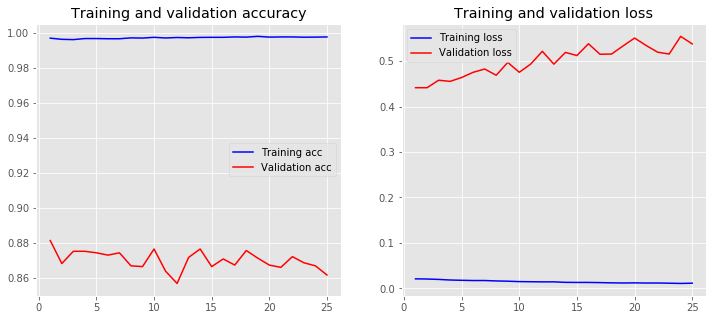

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit({'title_in': em_kag_train_padtitle, 'author_in': em_kag_train_padaut, 'text_in':em_kag_train_padtext},{'op': kag_train_y},
          epochs=25, batch_size=32,validation_data=({'title_in': em_kag_dev_padtitle, 'author_in': em_kag_dev_padaut, 'text_in':em_kag_dev_padtext},{'op': kag_dev_y}))
plot_history(h)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 18288 samples, validate on 2286 samples
Epoch 1/25





18288/18288 [==============================] - 153s 8ms/step - loss: 0.5706 - acc: 0.8427 - val_loss: 0.3224 - val_acc: 0.9213
Epoch 2/25
18288/18288 [==============================] - 150s 8ms/step - loss: 0.2932 - acc: 0.9182 - val_loss: 0.2930 - val_acc: 0.9204
Epoch 3/25
18288/18288 [==============================] - 146s 8ms/step - loss: 0.2475 - acc: 0.9272 - val_loss: 0.2999 - val_acc: 0.9125
Epoch 4/25
18288/18288 [==============================] - 149s 8ms/step - loss: 0.2019 - acc: 0.9445 - val_loss: 0.3076 - val_acc: 0.9042
Epoch 5/25
18288/18288 [==============================] - 149s 8ms/step - loss: 0.1551 - acc: 0.9676 - val_loss: 0.3353 - val_acc: 0.8985
Epoch 6/25
18288/18288 [==============================] - 146s 8ms/step - loss: 0.1211 - acc: 0.9818 - val_loss: 0.3409 - val_acc: 0.8933
Epoch 7/25
18288/18

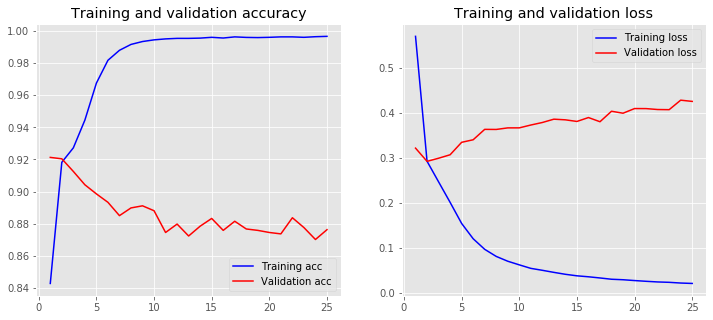

In [38]:
#test data model accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit({'title_in': em_kag_train_padtitle, 'author_in': em_kag_train_padaut, 'text_in':em_kag_train_padtext},{'op': kag_train_y},
          epochs=25, batch_size=32,validation_data=({'title_in': em_kag_test_padtitle, 'author_in': em_kag_test_padaut, 'text_in':em_kag_test_padtext},{'op': kag_test_y}))
plot_history(h)

In [0]:
#with kernel and bias regularizer 
#less agressive
#model 2
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*75)
h2=int(2/3*h1)
print(h1,h2)

title_in = Input(shape=(68,), name='title_in')
author_in = Input(shape=(24,), name='author_in')
text_in = Input(shape=(21041,), name='text_in')

title_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=68)(title_in)
author_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=24)(author_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=21041)(text_in)

title_pool = GlobalMaxPool1D()(title_embed)
author_pool = GlobalMaxPool1D()(author_embed)
text_pool = GlobalMaxPool1D()(text_embed)

all_d = concatenate([title_pool, author_pool,text_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(all_d)
d2 = Dense(h2, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model2 = Model(inputs=[title_in,author_in,text_in], outputs=[op])

model2.summary()

50 33
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_in (InputLayer)           (None, 68)           0                                            
__________________________________________________________________________________________________
author_in (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 21041)        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 68, 25)       5384725     title_in[0][0]                   
______________________________________________________________________________________

Train on 18288 samples, validate on 2286 samples
Epoch 1/10
18288/18288 [==============================] - 122s 7ms/step - loss: 0.3819 - acc: 0.8626 - val_loss: 0.2814 - val_acc: 0.9217
Epoch 2/10
18288/18288 [==============================] - 122s 7ms/step - loss: 0.2379 - acc: 0.9243 - val_loss: 0.2962 - val_acc: 0.9077
Epoch 3/10
18288/18288 [==============================] - 121s 7ms/step - loss: 0.1645 - acc: 0.9499 - val_loss: 0.3170 - val_acc: 0.8968
Epoch 4/10
18288/18288 [==============================] - 121s 7ms/step - loss: 0.1002 - acc: 0.9770 - val_loss: 0.3784 - val_acc: 0.8876
Epoch 5/10
18288/18288 [==============================] - 120s 7ms/step - loss: 0.0674 - acc: 0.9891 - val_loss: 0.4018 - val_acc: 0.8893
Epoch 6/10
18288/18288 [==============================] - 120s 7ms/step - loss: 0.0529 - acc: 0.9926 - val_loss: 0.3969 - val_acc: 0.8906
Epoch 7/10
18288/18288 [==============================] - 120s 7ms/step - loss: 0.0445 - acc: 0.9948 - val_loss: 0.4151 - v

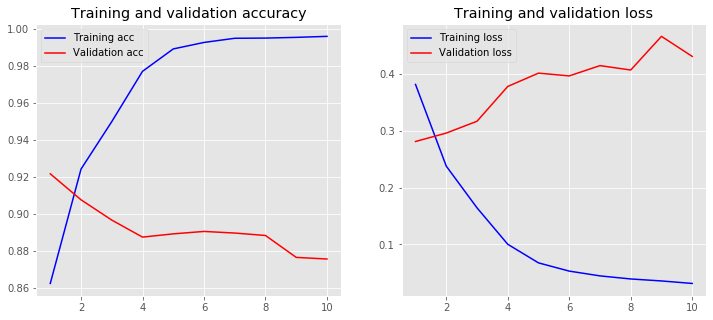

In [0]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model2.fit({'title_in': em_kag_train_padtitle, 'author_in': em_kag_train_padaut, 'text_in':em_kag_train_padtext},{'op': kag_train_y},
          epochs=10, batch_size=32,validation_data=({'title_in': em_kag_dev_padtitle, 'author_in': em_kag_dev_padaut, 'text_in':em_kag_dev_padtext},{'op': kag_dev_y}))
plot_history(h)

In [0]:
#activity regularizer
#less agressive
#model 3
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*75)
h2=int(2/3*h1)
print(h1,h2)

title_in = Input(shape=(68,), name='title_in')
author_in = Input(shape=(24,), name='author_in')
text_in = Input(shape=(21041,), name='text_in')

title_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=68)(title_in)
author_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=24)(author_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=21041)(text_in)

title_pool = GlobalMaxPool1D()(title_embed)
author_pool = GlobalMaxPool1D()(author_embed)
text_pool = GlobalMaxPool1D()(text_embed)

all_d = concatenate([title_pool, author_pool,text_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.001))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.001))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model3 = Model(inputs=[title_in,author_in,text_in], outputs=[op])

model3.summary()

50 33
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_in (InputLayer)           (None, 68)           0                                            
__________________________________________________________________________________________________
author_in (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 21041)        0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 68, 25)       5384725     title_in[0][0]                   
______________________________________________________________________________________

Train on 18288 samples, validate on 2286 samples
Epoch 1/25
18288/18288 [==============================] - 128s 7ms/step - loss: 0.3935 - acc: 0.8766 - val_loss: 0.2919 - val_acc: 0.9234
Epoch 2/25
18288/18288 [==============================] - 122s 7ms/step - loss: 0.2557 - acc: 0.9242 - val_loss: 0.2883 - val_acc: 0.9121
Epoch 3/25
18288/18288 [==============================] - 123s 7ms/step - loss: 0.1737 - acc: 0.9530 - val_loss: 0.3094 - val_acc: 0.9016
Epoch 4/25
18288/18288 [==============================] - 122s 7ms/step - loss: 0.1062 - acc: 0.9806 - val_loss: 0.3404 - val_acc: 0.8867
Epoch 5/25
18288/18288 [==============================] - 122s 7ms/step - loss: 0.0700 - acc: 0.9907 - val_loss: 0.3708 - val_acc: 0.8801
Epoch 6/25
18288/18288 [==============================] - 123s 7ms/step - loss: 0.0528 - acc: 0.9940 - val_loss: 0.4353 - val_acc: 0.8749
Epoch 7/25
18288/18288 [==============================] - 122s 7ms/step - loss: 0.0431 - acc: 0.9948 - val_loss: 0.4257 - v

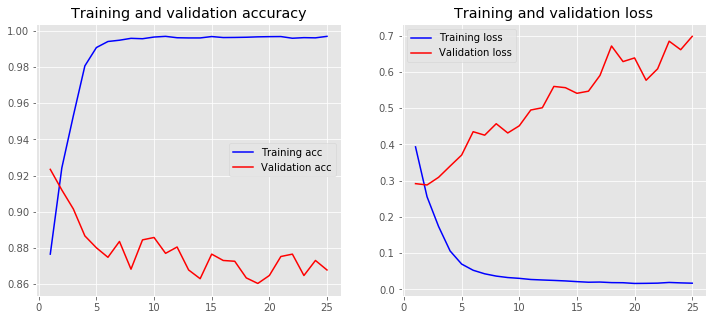

In [0]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model3.fit({'title_in': em_kag_train_padtitle, 'author_in': em_kag_train_padaut, 'text_in':em_kag_train_padtext},{'op': kag_train_y},
          epochs=25, batch_size=32,validation_data=({'title_in': em_kag_dev_padtitle, 'author_in': em_kag_dev_padaut, 'text_in':em_kag_dev_padtext},{'op': kag_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model 4
#not convincable gave bad accuracy
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*75)
h2=int(2/3*h1)
print(h1,h2)

title_in = Input(shape=(68,), name='title_in')
author_in = Input(shape=(24,), name='author_in')
text_in = Input(shape=(21041,), name='text_in')

title_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=68)(title_in)
author_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=24)(author_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=215389, input_length=21041)(text_in)

title_pool = GlobalMaxPool1D()(title_embed)
author_pool = GlobalMaxPool1D()(author_embed)
text_pool = GlobalMaxPool1D()(text_embed)

all_d = concatenate([title_pool, author_pool,text_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model4 = Model(inputs=[title_in,author_in,text_in], outputs=[op])

model4.summary()

50 33
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_in (InputLayer)           (None, 68)           0                                            
__________________________________________________________________________________________________
author_in (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 21041)        0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 68, 25)       5384725     title_in[0][0]                   
______________________________________________________________________________________

Train on 18288 samples, validate on 2286 samples
Epoch 1/25
18288/18288 [==============================] - 124s 7ms/step - loss: 0.8497 - acc: 0.5493 - val_loss: 0.6924 - val_acc: 0.5394
Epoch 2/25
18288/18288 [==============================] - 123s 7ms/step - loss: 0.6887 - acc: 0.5504 - val_loss: 0.6902 - val_acc: 0.5394
Epoch 3/25
18288/18288 [==============================] - 124s 7ms/step - loss: 0.6881 - acc: 0.5504 - val_loss: 0.6903 - val_acc: 0.5394
Epoch 4/25
18288/18288 [==============================] - 123s 7ms/step - loss: 0.6881 - acc: 0.5504 - val_loss: 0.6904 - val_acc: 0.5394
Epoch 5/25
18288/18288 [==============================] - 122s 7ms/step - loss: 0.6881 - acc: 0.5504 - val_loss: 0.6904 - val_acc: 0.5394
Epoch 6/25
18288/18288 [==============================] - 123s 7ms/step - loss: 0.6881 - acc: 0.5504 - val_loss: 0.6903 - val_acc: 0.5394
Epoch 7/25
18288/18288 [==============================] - 124s 7ms/step - loss: 0.6881 - acc: 0.5504 - val_loss: 0.6903 - v

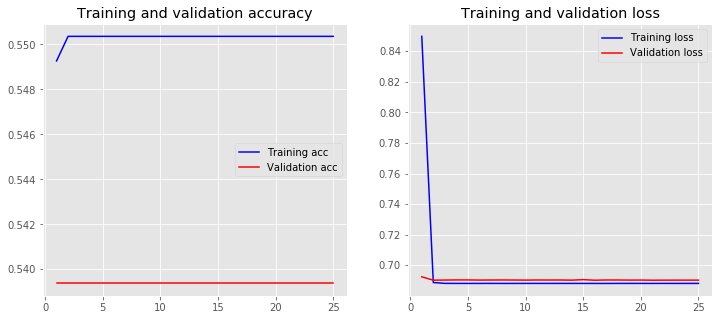

In [0]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model4.fit({'title_in': em_kag_train_padtitle, 'author_in': em_kag_train_padaut, 'text_in':em_kag_train_padtext},{'op': kag_train_y},
          epochs=25, batch_size=32,validation_data=({'title_in': em_kag_dev_padtitle, 'author_in': em_kag_dev_padaut, 'text_in':em_kag_dev_padtext},{'op': kag_dev_y}))
plot_history(h)